In [493]:
import pandas as pd
import numpy as np

input_file=pd.read_csv("movie_metadata.csv")
print(input_file.shape)

(5043, 28)


In [494]:
input_file=input_file.drop_duplicates(subset=["movie_title"])
print(input_file.shape)

(4917, 28)


In [495]:
input_file = input_file[input_file['gross'].notna()]
input_file = input_file[input_file['budget'].notna()]
print(input_file.shape)

(3789, 28)


In [496]:
input_file["color"].value_counts()

Color               3659
 Black and White    128 
Name: color, dtype: int64

In [497]:
input_file["country"].value_counts()

USA            2993
UK             313 
France         106 
Germany        79  
Canada         64  
               ..  
Greece         1   
Aruba          1   
Peru           1   
New Line       1   
Philippines    1   
Name: country, Length: 47, dtype: int64

In [498]:
input_file["language"].value_counts()

English      3607
French       37  
Spanish      26  
Mandarin     14  
German       13  
             ..  
Kazakh       1   
Bosnian      1   
Mongolian    1   
Telugu       1   
Swedish      1   
Name: language, Length: 38, dtype: int64

In [499]:
input_file["movie_facebook_likes"].value_counts(dropna=False)

0        1740
1000     86  
11000    71  
10000    63  
13000    50  
         ..  
408      1   
839      1   
876      1   
891      1   
74       1   
Name: movie_facebook_likes, Length: 700, dtype: int64

In [504]:
input_file["aspect_ratio"].value_counts(dropna=False)
#print(input_file["aspect_ratio"].mean())

2.1075666218036284


In [528]:
input_file=input_file.sort_values(by=['imdb_score'], ascending=False)
print(input_file[["movie_title", "imdb_score"]].head(15))

input_file[["movie_title", "imdb_score"]].head(15).to_csv(r'export_dataframe.csv', index = False, header=True)

                                             movie_title  imdb_score
1937  The Shawshank Redemption                            9.3       
3466  The Godfather                                       9.2       
66    The Dark Knight                                     9.0       
2837  The Godfather: Part II                              9.0       
3355  Pulp Fiction                                        8.9       
...             ...                                       ...       
270   The Lord of the Rings: The Fellowship of the Ring   8.8       
97    Inception                                           8.8       
836   Forrest Gump                                        8.8       
3867  One Flew Over the Cuckoo's Nest                     8.7       
4747  Seven Samurai                                       8.7       

[15 rows x 2 columns]


In [508]:
input_file["profit"]=input_file["gross"]-input_file["budget"]
#print(input_file)

input_file=input_file.sort_values(by=['profit'], ascending=False)
print(input_file[["movie_title", "profit"]].head(15))

input_file[["movie_title", "profit"]].head(15).to_csv(r'export_dataframe.csv', index = False, header=True)

                                     movie_title       profit
0     Avatar                                      523505847.0
29    Jurassic World                              502177271.0
26    Titanic                                     458672302.0
3024  Star Wars: Episode IV - A New Hope          449935665.0
3080  E.T. the Extra-Terrestrial                  424449459.0
17    The Avengers                                403279547.0
509   The Lion King                               377783777.0
240   Star Wars: Episode I - The Phantom Menace   359544677.0
66    The Dark Knight                             348316061.0
439   The Hunger Games                            329999255.0
812   Deadpool                                    305024263.0
186   The Hunger Games: Catching Fire             294645577.0
697   Jurassic Park                               293784000.0
521   Despicable Me 2                             292049635.0
814   American Sniper                             291323553.0


<AxesSubplot:xlabel='imdb_score', ylabel='profit'>

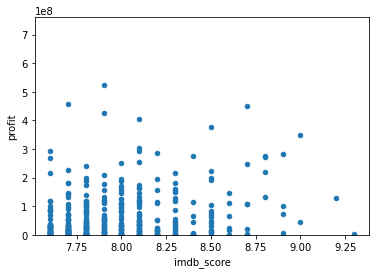

In [467]:
input_file=input_file.sort_values(by=['imdb_score'], ascending=False)
input_file.head(500).plot.scatter(x="imdb_score", y="profit", ylim=[0,None])

<AxesSubplot:xlabel='budget'>

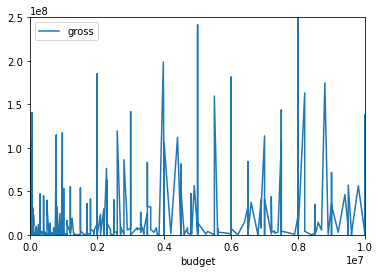

In [475]:
input_file=input_file.sort_values(by=['budget'])
input_file.plot.line(x="budget", y="gross", ylim=[0,250000000], xlim=[0,10000000])

In [511]:
#stuff about genres

import warnings
warnings.filterwarnings('ignore')

movie_genres=["Action","Adventure","Animation","Comedy", "Drama", "Family", "Fantasy", "Thriller", "Crime", "Horror", "Sci-Fi", "Romance", "Adventure", "Musical", "Mystery", "Biography", "Film-Noir", "History","Short", "Sport", "War", "Western"]
sample=input_file['genres'].astype(str).str.split('|', expand=True)

scores=input_file["imdb_score"]
#print(scores)
sample.insert(8, "8", scores,True)

#print(input_file)
#print(sample)

genre_info=pd.DataFrame()
genre_info["Genre Name"]=[]
genre_info["Total"]=[]
genre_info["Average Score"]=[]

for j in range(0,len(movie_genres)):
    total=0
    for i in range(0, 8):
        total=total+sample[i].str.count(movie_genres[j]).sum()   
    
    storage=[]
    #storage.append()
    
    average_total=0
    for index, row in sample.iterrows():
        #print(row["8"])
        if row[0]==movie_genres[j] or row[1]==movie_genres[j] or row[2]==movie_genres[j] or row[3]==movie_genres[j] or row[4]==movie_genres[j] or row[5]==movie_genres[j] or row[6]==movie_genres[j] or row[7]==movie_genres[j]: 
            average_total=average_total+row["8"]
            
    genre_info=genre_info.append({"Genre Name": movie_genres[j], "Total": str(total), "Average Score": average_total/total}, ignore_index = True)
    #print(average_total/total)
    
print(genre_info)

   Genre Name   Total  Average Score
0   Action     935.0   6.285989     
1   Adventure  766.0   6.454961     
2   Animation  197.0   6.700508     
3   Comedy     1491.0  6.182763     
4   Drama      1913.0  6.787663     
..    ...         ...       ...     
17  History    153.0   7.122876     
18  Short      2.0     6.800000     
19  Sport      147.0   6.601361     
20  War        159.0   7.048428     
21  Western    60.0    6.756667     

[22 rows x 3 columns]


<AxesSubplot:xlabel='Genre Name'>

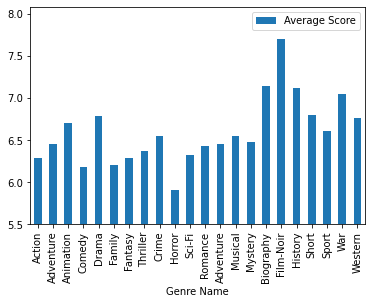

In [515]:
genre_info.to_csv(r'export_dataframe.csv', index = False, header=True)
genre_info.plot.bar(x="Genre Name", y="Average Score", ylim=[5.5,None])

In [514]:
years=[]
for index, row in input_file["title_year"].iteritems():
    if row not in years and pd.notnull(row):
        years.append(row)
        
#print(years)
year_totals=input_file["title_year"].value_counts()

year_info=pd.DataFrame()
year_info["Year"]=[]
year_info["Number of Movies"]=[]
year_info["Average Score"]=[]

for i in range(0,len(years)):
    total=0
    for index,row in input_file.iterrows():
        if row["title_year"]==years[i]:
            total=total+row["imdb_score"]
    #print(years[i],":",total/year_totals[years[i]])
    year_info=year_info.append({"Year": years[i], "Number of Movies": year_totals[years[i]], "Average Score": total/year_totals[years[i]]}, ignore_index = True)
    
year_info=year_info.sort_values(by=['Year'])
print(year_info)

      Year  Number of Movies  Average Score
67  1920.0  1.0               4.800000     
74  1927.0  1.0               8.300000     
68  1929.0  1.0               6.300000     
70  1933.0  1.0               7.700000     
69  1935.0  1.0               7.800000     
..     ...  ...                    ...     
5   2012.0  159.0             6.476101     
10  2013.0  165.0             6.556970     
12  2014.0  151.0             6.449007     
1   2015.0  127.0             6.538583     
9   2016.0  64.0              6.351563     

[75 rows x 3 columns]


<AxesSubplot:xlabel='Year'>

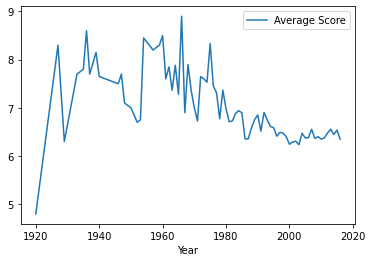

In [516]:
#input_file["genres"].value_counts().plot.bar()
year_info.to_csv(r'export_dataframe.csv', index = False, header=True)
year_info.plot.line(x="Year", y="Average Score")

<AxesSubplot:xlabel='Year'>

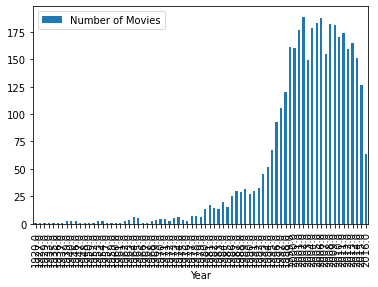

In [376]:
year_info.plot.bar(x="Year", y="Number of Movies")

In [356]:
directors=[]
for index, row in input_file["director_name"].iteritems():
    if row not in directors and pd.notnull(row):
        directors.append(row)
        
director_totals=input_file["director_name"].value_counts()

director_info=pd.DataFrame()
director_info["Director"]=[]
director_info["Average Score"]=[]

for i in range(0,len(directors)):
    total=0
    for index,row in input_file.iterrows():
        if row["director_name"]==directors[i]:
            total=total+row["imdb_score"]
    #print(directors[i],":",total/director_totals[directors[i]])
    director_info=director_info.append({"Director": directors[i], "Average Score": total/director_totals[directors[i]]}, ignore_index = True)

director_info=director_info.sort_values(by=['Average Score'], ascending=False)
#print(director_info)

James Cameron : 7.914285714285714
Gore Verbinski : 6.985714285714286
Sam Mendes : 7.457142857142856
Christopher Nolan : 8.425
Andrew Stanton : 7.733333333333333
Sam Raimi : 6.960000000000001
Nathan Greno : 7.8
Joss Whedon : 7.866666666666667
David Yates : 7.2
Zack Snyder : 7.142857142857143
Bryan Singer : 7.2875000000000005
Marc Forster : 7.228571428571429
Andrew Adamson : 7.15
Rob Marshall : 6.6
Barry Sonnenfeld : 6.457142857142856
Peter Jackson : 7.888888888888889
Marc Webb : 7.133333333333333
Ridley Scott : 7.13125
Chris Weitz : 6.08
Anthony Russo : 7.0
Peter Berg : 6.666666666666667
Colin Trevorrow : 7.0
Shane Black : 7.4
Tim Burton : 7.05
Brett Ratner : 6.455555555555556
Dan Scanlon : 7.3
Michael Bay : 6.616666666666667
Joseph Kosinski : 6.9
John Lasseter : 7.38
Martin Campbell : 6.550000000000001
Lee Unkrich : 8.3
McG : 6.083333333333333
James Wan : 7.2
J.J. Abrams : 7.449999999999999
Baz Luhrmann : 7.075
Mike Newell : 6.8428571428571425
Guillermo del Toro : 7.140000000000001
Ste

Stanley Kubrick : 7.800000000000001
Will Gluck : 6.3
Glenn Ficarra : 6.866666666666667
David S. Goyer : 5.35
Taylor Hackford : 6.883333333333333
Michael Lehmann : 5.65
Stuart Beattie : 5.1
Roman Polanski : 7.325
Frank Miller : 6.466666666666666
Baltasar Kormákur : 6.766666666666667
Daniel Lee : 6.1
Keenen Ivory Wayans : 5.175
Rob Reiner : 7.0181818181818185
Marco Schnabel : 3.8
Demian Lichtenstein : 5.9
Josh Gordon : 6.199999999999999
Tim Hill : 5.55
David Frankel : 6.6000000000000005
Brenda Chapman : 7.0
Marc Lawrence : 5.4
Peter Billingsley : 5.5
Wes Ball : 6.6
Ryan Murphy : 5.95
Robert Redford : 6.839999999999999
Jay Russell : 6.733333333333333
Kenny Ortega : 6.166666666666667
David McNally : 5.0
Brian Robbins : 5.533333333333334
Brian Levant : 4.816666666666666
Steven Zaillian : 6.35
Chris Butler : 7.0
Jon Avnet : 6.0
Sam Fell : 6.1
Kevin Donovan : 5.3
Geoff Murphy : 5.4
David O. Russell : 7.171428571428571
Babak Najafi : 5.9
Jean-Pierre Jeunet : 7.340000000000001
Graham Annable : 

Tom Vaughan : 6.3
Stephen Hillenburg : 7.0
Stig Bergqvist : 6.1
Jason Reitman : 7.140000000000001
Alexander Payne : 7.42
Jonathan Levine : 7.2
Rian Johnson : 7.15
Chris Noonan : 6.9
Michael McCullers : 6.0
Forest Whitaker : 5.9
Gary Winick : 6.075
Woody Allen : 6.999999999999998
Peter Lepeniotis : 5.8
Ted Demme : 7.6
William Shatner : 5.4
Steve Box : 7.5
Lee Toland Krieger : 7.2
Tim McCanlies : 7.6
Drew Goddard : 7.0
Jason Friedberg : 2.6
Paul Michael Glaser : 6.6
John R. Leonetti : 4.550000000000001
Tom Hanks : 6.5
Kimberly Peirce : 6.666666666666667
Liz Friedlander : 6.7
Phil Joanou : 6.9
Shane Acker : 7.1
Stephen J. Anderson : 7.3
Troy Miller : 3.4
Tate Taylor : 7.5
Brett Leonard : 5.45
Alister Grierson : 5.9
Nick Hurran : 5.2
Charles Stone III : 5.6
Paul Haggis : 7.65
Kurt Wimmer : 5.95
Jean-François Richet : 6.3
Kevin Hooks : 5.3
Ellory Elkayem : 5.4
Niki Caro : 7.433333333333333
Vincenzo Natali : 6.55
Willard Huyck : 4.6
Gavin O'Connor : 6.9799999999999995
Bruce Hunt : 5.1
Craig 

Peter Atencio : 6.4
David Nutter : 5.5
Derek Cianfrance : 7.35
Stephan Elliott : 4.9
Mark L. Lester : 6.0
Tom Green : 4.5
Mike Nawrocki : 6.15
Douglas Aarniokoski : 4.6
Bryan Barber : 6.2
Lone Scherfig : 7.15
Drew Barrymore : 6.9
James Foley : 6.833333333333333
Albert Brooks : 5.6
Steve Gomer : 2.8
RZA : 5.4
Mark Piznarski : 5.1
Craig Brewer : 7.2
Michael Winterbottom : 6.4799999999999995
David Raynr : 5.45
Mort Nathan : 4.9
Wil Shriner : 5.6
Martin McDonagh : 7.6
Tina Gordon Chism : 5.3
Peter Cattaneo : 6.55
Vicky Jenson : 5.3
Mary Lambert : 5.6
Peter Kassovitz : 6.5
Rodman Flender : 6.2
Mark Romanek : 7.0
Brad Anderson : 6.860000000000001
Michael Chapman : 5.3
Antonio Banderas : 6.3
Fritz Lang : 8.3
Hsiao-Hsien Hou : 6.4
Gregor Jordan : 6.9
Tony Jaa : 6.2
Ryûhei Kitamura : 6.1
Dito Montiel : 5.1
Stefan Ruzowitzky : 5.633333333333333
Jake Paltrow : 5.9
Gregory Jacobs : 5.7
Gilles Paquet-Brenner : 7.5
Lars von Trier : 7.5
John Cornell : 5.5
Jamie Blanks : 5.1
Randal Kleiser : 6.95
Rick

Christine Jeffs : 6.9
Michael Tiddes : 4.433333333333333
Bill Duke : 6.1
Mamoru Hosoda : 5.9
Brian Dannelly : 6.9
Denys Arcand : 7.7
J.S. Cardone : 5.3
Jay Levey : 7.0
Tamara Jenkins : 6.6
Ronan Chapalain : 6.9
Xavier Beauvois : 7.2
Randall Miller : 6.949999999999999
Dan Rush : 6.4
Michael Cuesta : 7.1
Fenton Bailey : 6.55
Jeremy Saulnier : 7.1
James Manera : 4.4
Nicholas Fackler : 7.3
Morgan J. Freeman : 6.35
Klaus Menzel : 3.3
William H. Macy : 7.5
Jirí Menzel : 7.4
Fatih Akin : 7.3
Frank LaLoggia : 6.7
Michel Leclerc : 7.2
Tom Kalin : 5.9
Carlos Saura : 7.2
Andrew Erwin : 5.4
Mike van Diem : 7.8
Jonas Åkerlund : 6.8
Barry Skolnick : 6.5
Johnnie To : 7.3
Agnieszka Wojtowicz-Vosloo : 5.9
Ernie Barbarash : 5.8
Nick Love : 6.1
R. Balki : 7.2
Cecil B. DeMille : 6.7
Henry Hobson : 5.6
Mike Figgis : 6.5
Lisa Cholodenko : 7.1
Ed Gass-Donnelly : 4.0
DJ Pooh : 4.3
Patrick Stettner : 5.9
Roger Avary : 6.6
Allison Anders : 6.4
Rick de Oliveira : 2.7
Jeff Franklin : 5.8
Mike Mills : 6.9
Dave McK

              Director  Average Score
1189  Tony Kaye         8.6          
1585  Charles Chaplin   8.6          
1727  Majid Majidi      8.5          
1439  Ron Fricke        8.5          
857   Alfred Hitchcock  8.5          
...                ...  ...          
559   S.S. Rajamouli    8.4          
625   Richard Marquand  8.4          
1505  Billy Wilder      8.3          
1038  Fritz Lang        8.3          
1079  Lenny Abrahamson  8.3          

[15 rows x 2 columns]


<AxesSubplot:xlabel='Director'>

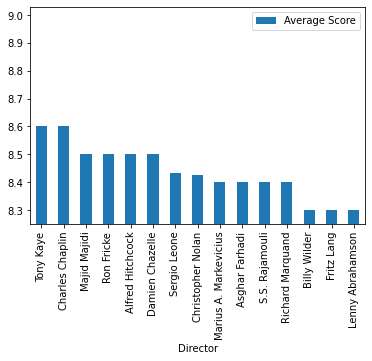

In [526]:
print(director_info.head(15))
director_info.head(15).plot.bar(x="Director", y="Average Score", ylim=[8.25,None])

In [380]:
actors=[]
for index, row in input_file["actor_1_name"].iteritems():
    if row not in actors and pd.notnull(row):
        actors.append(row)
        
actor_totals=input_file["actor_1_name"].value_counts()

actor_info=pd.DataFrame()
actor_info["Actor"]=[]
actor_info["Average Score"]=[]

for i in range(0,len(actors)):
    total=0
    for index,row in input_file.iterrows():
        if row["actor_1_name"]==actors[i]:
            total=total+row["imdb_score"]
    #print(actors[i],":",total/actor_totals[actors[i]])
    actor_info=actor_info.append({"Actor": actors[i], "Average Score": total/actor_totals[actors[i]]}, ignore_index = True)

actor_info=actor_info.sort_values(by=['Average Score'], ascending=False)
#print(actor_info)

                       Actor  Average Score
1426  Takashi Shimura         8.7          
1205  Scatman Crothers        8.7          
1341  Paulette Goddard        8.6          
825   Bunta Sugawara          8.6          
1217  Collin Alfredo St. Dic  8.5          
544   Emilia Fox              8.5          
786   Janet Leigh             8.5          
1475  Bahare Seddiqi          8.5          
900   Claude Rains            8.4          
984   Jürgen Prochnow         8.4          


<AxesSubplot:xlabel='Actor'>

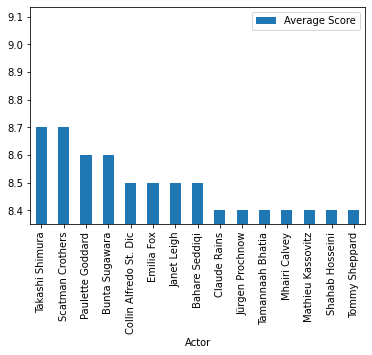

In [527]:
print(actor_info.head(10))
actor_info.head(15).plot.bar(x="Actor", y="Average Score", ylim=[8.35,None])

In [513]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)